## Assignment 8-Dog vs Cat

#### Ingest

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"
from sklearn.metrics import classification_report,confusion_matrix
import cv2
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout,Conv2D, MaxPooling2D,BatchNormalization

Showing Image

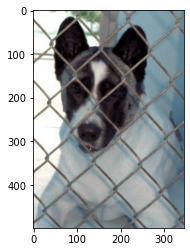

In [35]:
PATH = '/Users/jiashuzhou/Desktop/MSDS 422/Module 8'
file = 'train'
filename = os.listdir('/Users/jiashuzhou/Desktop/MSDS 422/Module 8/train')

image1 =cv2.imread('/Users/jiashuzhou/Desktop/MSDS 422/Module 8/train/dog.12437.jpg')
plt.imshow(image1)

In [55]:
len(filename)
filename[0:5]

25000

['dog.8011.jpg',
 'cat.5077.jpg',
 'dog.7322.jpg',
 'cat.2718.jpg',
 'cat.10151.jpg']

In [73]:
#preparing training data
x_train = []
y_train = []
testing_data = []
path = os.path.join(PATH, "train")
for i in filename:
    category = i.split('.')[0]
    img = cv2.imread(os.path.join(path,i),0)
    resize_img = cv2.resize(img, dsize = (100,100))
    x_train.append(resize_img)
    y_train.append(category)

In [74]:
len(x_train)
len(y_train)

25000

25000

In [81]:
x = np.array(x_train).reshape(-1,100,100,1)
x = x/255
x.shape

(25000, 100, 100, 1)

In [82]:
cg = {0:{'cat':0, 'dog':1}}
trainy = pd.DataFrame(y_train)
y = trainy.replace(cg)
y.head()

,0
0,1
1,0
2,1
3,0
4,0


CNN

Sample data take 5000 from training data

In [112]:
s1_train = x[13000:18000]
s1_y = y[13000:18000]
len(s1_train)


5000

In [113]:
xx_train, xx_test, yy_train, yy_test = train_test_split(s1_train, s1_y, test_size = 0.2, random_state=42)

In [130]:
model1 = Sequential()
model1.add(Conv2D(32, (3,3), activation ='relu', input_shape=xx_train.shape[1:]))
model1.add(Conv2D(32, (3,3), activation = 'relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(64, (3,3), activation = 'relu'))
model1.add(Conv2D(64, (3,3), activation = 'relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Flatten())
#model1.add(Dropout(0.2))
model1.add(Dense(1, activation = 'sigmoid'))

model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 98, 98, 32)        320       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 30976)            

In [122]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
                    verbose=1,patience=5)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./log1")



In [131]:
history = model1.fit(xx_train, yy_train, batch_size=30, epochs=20, validation_data = (xx_test, yy_test))

Epoch 1/20
134/134 [==============================] - 41s 299ms/step - loss: 0.6944 - accuracy: 0.5206 - val_loss: 0.6845 - val_accuracy: 0.5400
Epoch 2/20
134/134 [==============================] - 43s 324ms/step - loss: 0.6829 - accuracy: 0.5505 - val_loss: 0.6678 - val_accuracy: 0.6100
Epoch 3/20
134/134 [==============================] - 41s 303ms/step - loss: 0.6454 - accuracy: 0.6389 - val_loss: 0.6646 - val_accuracy: 0.6010
Epoch 4/20
134/134 [==============================] - 39s 292ms/step - loss: 0.6320 - accuracy: 0.6385 - val_loss: 0.6102 - val_accuracy: 0.6880
Epoch 5/20
134/134 [==============================] - 39s 288ms/step - loss: 0.5452 - accuracy: 0.7215 - val_loss: 0.6008 - val_accuracy: 0.6820
Epoch 6/20
134/134 [==============================] - 39s 288ms/step - loss: 0.4965 - accuracy: 0.7421 - val_loss: 0.5682 - val_accuracy: 0.7250
Epoch 7/20
134/134 [==============================] - 39s 293ms/step - loss: 0.4443 - accuracy: 0.7881 - val_loss: 0.6725 - val_ac

In [126]:
#ppred_ytest = model1.predict(xx_test).ravel()

Second try on CNN

In [135]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) 
model.add(Dropout(0.25))
model.add(Dense(64))
model.add(Dense(1))

model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [136]:
# 
history = model.fit(xx_train, 
                    yy_train, 
                    batch_size=20, 
                    epochs=20, 
                    callbacks = [early_stopping_cb, 
                                 tensorboard_callback],
                    validation_data = (xx_test, yy_test))

Epoch 1/20
200/200 [==============================] - 27s 135ms/step - loss: 0.7416 - accuracy: 0.5238 - val_loss: 0.6658 - val_accuracy: 0.6070
Epoch 2/20
200/200 [==============================] - 26s 132ms/step - loss: 0.6300 - accuracy: 0.6550 - val_loss: 0.6416 - val_accuracy: 0.6450
Epoch 3/20
200/200 [==============================] - 26s 132ms/step - loss: 0.5652 - accuracy: 0.7156 - val_loss: 0.6399 - val_accuracy: 0.6360
Epoch 4/20
200/200 [==============================] - 26s 132ms/step - loss: 0.5226 - accuracy: 0.7497 - val_loss: 0.5963 - val_accuracy: 0.7000
Epoch 5/20
200/200 [==============================] - 27s 135ms/step - loss: 0.4517 - accuracy: 0.7872 - val_loss: 0.6149 - val_accuracy: 0.6870
Epoch 6/20
200/200 [==============================] - 26s 132ms/step - loss: 0.3864 - accuracy: 0.8183 - val_loss: 0.6526 - val_accuracy: 0.7140
Epoch 7/20
200/200 [==============================] - 27s 134ms/step - loss: 0.3352 - accuracy: 0.8532 - val_loss: 0.7190 - val_ac

ROC curve and confusion matrix

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'False positive rate')

Text(0, 0.5, 'True positive rate')

Text(0.5, 1.0, 'ROC curve')

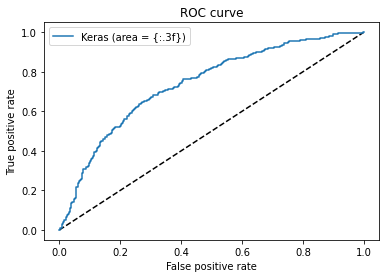

In [139]:
ppred_ytest = model.predict(xx_test).ravel()
from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(yy_test, ppred_ytest)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [148]:
from sklearn import metrics
pptest = model.predict(xx_test)
ptest=np.where(pptest>0.5 ,1,0)

#for i in range(pptest.shape[0]):
   # if pptest[i] > 0.5:
   #     ptest[i] = 1
   # else:
    #    ptest[i] = 0
confusion_matrix = metrics.confusion_matrix(yy_test, ptest)
confusion_matrix
print(classification_report(yy_test, ptest))

array([[371, 135],
       [176, 318]])

              precision    recall  f1-score   support

           0       0.68      0.73      0.70       506
           1       0.70      0.64      0.67       494

    accuracy                           0.69      1000
   macro avg       0.69      0.69      0.69      1000
weighted avg       0.69      0.69      0.69      1000



Full set training data

In [83]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [90]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=200, epochs=10, validation_data = (X_test, y_test))

Epoch 1/10
100/100 [==============================] - 793s 8s/step - loss: 0.6765 - accuracy: 0.5745 - val_loss: 0.6715 - val_accuracy: 0.5986
Epoch 2/10
100/100 [==============================] - 762s 8s/step - loss: 0.6566 - accuracy: 0.6130 - val_loss: 0.6122 - val_accuracy: 0.6648
Epoch 3/10
100/100 [==============================] - 769s 8s/step - loss: 0.5951 - accuracy: 0.6863 - val_loss: 0.5526 - val_accuracy: 0.7186
Epoch 4/10
100/100 [==============================] - 774s 8s/step - loss: 0.5414 - accuracy: 0.7318 - val_loss: 0.5405 - val_accuracy: 0.7352
Epoch 5/10
100/100 [==============================] - 797s 8s/step - loss: 0.5049 - accuracy: 0.7573 - val_loss: 0.5291 - val_accuracy: 0.7460
Epoch 6/10
100/100 [==============================] - 800s 8s/step - loss: 0.4696 - accuracy: 0.7813 - val_loss: 0.4884 - val_accuracy: 0.7660
Epoch 7/10
100/100 [==============================] - 788s 8s/step - loss: 0.4369 - accuracy: 0.8014 - val_loss: 0.5095 - val_accuracy: 0.7470

In [94]:
filename2 = os.listdir('/Users/jiashuzhou/Desktop/MSDS 422/Module 8/test')

path2 = os.path.join(PATH, "test")
for i in filename2:
    #category = i.split('.')[0]
    img2 = cv2.imread(os.path.join(path2,i),0)
    resize_img2 = cv2.resize(img2, dsize = (100,100))
    testing_data.append(resize_img2)
test = np.array(testing_data).reshape(-1,100,100,1)
test = test/255
test.shape



(12500, 100, 100, 1)

In [106]:
pred1 = model.predict(test)

In [107]:
pred1.shape

(12500, 1)

In [108]:
sub1 = pd.read_csv('sub1.csv')
sub1['label'] = pred1
#sub1['label'] = sub1['label'].map(lambda x:1 if x >= 0.5 else 0)

In [109]:
sub1.to_csv('pred1.csv', index = False)

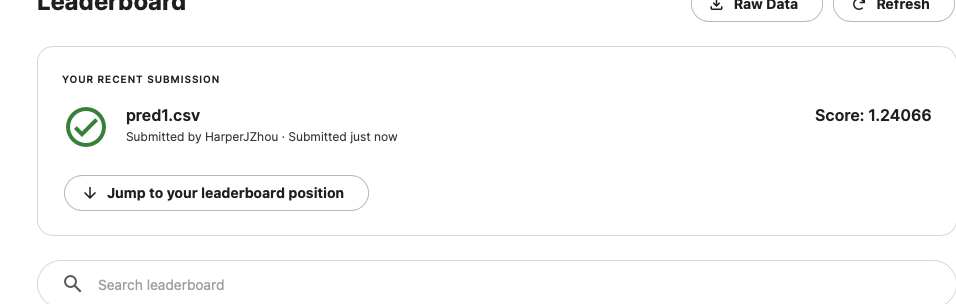